# **CAPSTONE PROJECT - Classification Pose for Stroke Rehabilitation**

---

**Team ID** : C22-PS185

**Nama Anggota** : 
1. M2006F0601 - Chindy Aulia Sari - Universitas Brawijaya
2. M2006F0600 - Firda Adha Cahyanti - Universitas Brawijaya

**Tema** : Human Healthcare & Animal Welfare

## **1. Dataset**

Proyek ini menggunakan dataset gambar no copyright yang ada di internet. Dataset ini berisi  gambar beberapa pose wajah untuk terapy wajah pasca stroke, dimana gambar dikategorikan sebagai smile, open mouth, sneer/smirk, show teeth, dan cheek-puff. Dataset ini dapat diunduh di sini https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t

## **2. Data Loading**
Tahap ini merupakan tahapan mengakses data, seperti menyiapkan library dan akses terhadap datasetnya.

**2.1. Mengimpor Library yang akan digunakan**

In [1]:
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

**2.2. Mengunduh Dataset**

In [3]:
!wget --no-check-certificate \
    "https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t" \
    -O "/tmp/data.zip"

local_zip = '/tmp/data.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2022-06-08 05:51:53--  https://drive.google.com/u/0/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Resolving drive.google.com (drive.google.com)... 142.251.6.113, 142.251.6.101, 142.251.6.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t [following]
--2022-06-08 05:51:53--  https://drive.google.com/uc?id=16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58&export=download&confirm=t
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3aujpn9v9i4jltrnb9i6gmim9bg176jt/1654667475000/10501907559150766263/*/16S4zn1SMGOKvoRC1bn5LCQn1xmPvEH58?e=download [following]
--2022-06-08 05:51:53--  https://doc-0s-6c-docs.googleusercontent.com/docs/securesc/

**2.3. Mengakses Direktori Dataset yang akan digunakan**

In [4]:
#root directory
root_dir = '/tmp/faces'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  os.makedirs(root_path + '/training')
  os.makedirs(root_path + '/validation')
  os.makedirs(root_path + '/training/open-mouth')
  os.makedirs(root_path + '/training/puff-cheeck')
  os.makedirs(root_path + '/training/show-teeth')
  os.makedirs(root_path + '/training/smile')
  os.makedirs(root_path + '/training/sneer')
  
  os.makedirs(root_path + '/validation/open-mouth')
  os.makedirs(root_path + '/validation/puff-cheeck')
  os.makedirs(root_path + '/validation/show-teeth')
  os.makedirs(root_path + '/validation/smile')
  os.makedirs(root_path + '/validation/sneer')

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/faces/validation
/tmp/faces/training
/tmp/faces/validation/open-mouth
/tmp/faces/validation/sneer
/tmp/faces/validation/puff-cheeck
/tmp/faces/validation/show-teeth
/tmp/faces/validation/smile
/tmp/faces/training/open-mouth
/tmp/faces/training/sneer
/tmp/faces/training/puff-cheeck
/tmp/faces/training/show-teeth
/tmp/faces/training/smile


**2.4. Membagi Dataset menjadi data train dan validasi dengan komposisi 8:3**

In [6]:

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """

  ### START CODE HERE
  files = []
  for path in os.listdir(SOURCE_DIR):
    if os.path.getsize(SOURCE_DIR + path) > 0:
      files.append(SOURCE_DIR + path)
    else:
      print(path+' is zero length, so ignoring.')


  random_trainfile = random.sample(files, int(SPLIT_SIZE*len(files)))

  for path in random_trainfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], TRAINING_DIR + path[path.rfind('/')+1 : ])

  random_testingfiles = list(set(files)-set(random_trainfile))
  random_testingfile = random.sample(random_testingfiles, len(random_testingfiles))
  
  for path in random_testingfile:
    copyfile(SOURCE_DIR + path[path.rfind('/')+1 : ], VALIDATION_DIR + path[path.rfind('/')+1 : ])


In [7]:
om_dir = "/tmp/face/open-mouth/"
smile_dir = "/tmp/face/smile/"
puff_dir = "/tmp/face/puff-cheeks/"
show_dir = "/tmp/face/show-teeth/"
sneer_dir = "/tmp/face/sneer-on-one-side/"

TRAINING_DIR = "/tmp/faces/training/"
VALIDATION_DIR = "/tmp/faces/validation/"

TRAINING_SMILE_DIR = os.path.join(TRAINING_DIR, "smile/")
VALIDATION_SMILE_DIR = os.path.join(VALIDATION_DIR, "smile/")

TRAINING_sneer_DIR = os.path.join(TRAINING_DIR, "sneer/")
VALIDATION_sneer_DIR = os.path.join(VALIDATION_DIR, "sneer/")

TRAINING_show_DIR = os.path.join(TRAINING_DIR, "show-teeth/")
VALIDATION_show_DIR = os.path.join(VALIDATION_DIR, "show-teeth/")

TRAINING_puff_DIR = os.path.join(TRAINING_DIR, "puff-cheeck/")
VALIDATION_puff_DIR = os.path.join(VALIDATION_DIR, "puff-cheeck/")

TRAINING_open_DIR = os.path.join(TRAINING_DIR, "open-mouth/")
VALIDATION_open_DIR = os.path.join(VALIDATION_DIR, "open-mouth/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_SMILE_DIR)) > 0:
  for file in os.scandir(TRAINING_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_sneer_DIR)) > 0:
  for file in os.scandir(TRAINING_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_show_DIR)) > 0:
  for file in os.scandir(TRAINING_show_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_puff_DIR)) > 0:
  for file in os.scandir(TRAINING_puff_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_open_DIR)) > 0:
  for file in os.scandir(TRAINING_open_DIR):
    os.remove(file.path)


if len(os.listdir(VALIDATION_SMILE_DIR)) > 0:
  for file in os.scandir(VALIDATION_SMILE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sneer_DIR)) > 0:
  for file in os.scandir(VALIDATION_sneer_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_show_DIR)) > 0:
  for file in os.scandir(VALIDATION_show_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_puff_DIR)) > 0:
  for file in os.scandir(VALIDATION_puff_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_open_DIR)) > 0:
  for file in os.scandir(VALIDATION_open_DIR):
    os.remove(file.path)

split_size = .8

split_data(om_dir, TRAINING_open_DIR, VALIDATION_open_DIR, split_size)
split_data(smile_dir, TRAINING_SMILE_DIR, VALIDATION_SMILE_DIR, split_size)
split_data(puff_dir, TRAINING_puff_DIR, VALIDATION_puff_DIR, split_size)
split_data(show_dir, TRAINING_show_DIR, VALIDATION_show_DIR, split_size)
split_data(sneer_dir, TRAINING_sneer_DIR, VALIDATION_sneer_DIR, split_size)

## **3. Data Pre-processing dan Data Augmentation**
Tahap ini merupakan tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Instantiate the ImageDataGenerator class
  train_datagen = ImageDataGenerator(rescale=1/255
                                    ,rotation_range=40,
                                     width_shift_range=0.25,
                                     height_shift_range=0.25,
                                     shear_range=0.25,
                                     zoom_range=0.25,
                                     horizontal_flip=True,
                                     fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=25,
                                                      class_mode='categorical',
                                                      shuffle=True,
                                                      target_size=(224, 224))

  # Instantiate the ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,
                                                                shuffle=True,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))
  ### END CODE HERE
  return train_generator, validation_generator

In [9]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 720 images belonging to 5 classes.
Found 180 images belonging to 5 classes.


## **4. Modeling**

Pada tahap ini, kita akan mengembangkan model machine learning dengan algoritma convolutional neural network (CNN) dari MobileNetV2

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf.h5 \
    -O /tmp/mobilenet_1_0_224_tf.h5

--2022-06-08 05:52:53--  https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 74.125.126.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17225924 (16M) [application/x-hdf]
Saving to: ‘/tmp/mobilenet_1_0_224_tf.h5’

/tmp/mobilenet_1_0_ 100%[===================>]  16.43M  --.-KB/s    in 0.09s   

2022-06-08 05:52:53 (185 MB/s) - ‘/tmp/mobilenet_1_0_224_tf.h5’ saved [17225924/17225924]



In [12]:
# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/mobilenet_1_0_224_tf.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = tf.keras.applications.mobilenet.MobileNet(input_shape = (224, 224, 3), 
                                include_top = True,
                                weights = 'imagenet' )

pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

17235968/17225924 [==============================] - 0s 0us/step


In [13]:
pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [14]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('conv_pw_13_relu')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 1024)


In [15]:
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

**Menggunakan Callback**

In [16]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 0.9 % accuracy so cancelling training!")
      self.model.stop_training = True

In [17]:
callback = myCallback()
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# Set the training parameters
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## **5. Training Model**

In [20]:
# callbacks = myCallback()
history = model.fit(
            train_generator,
                    steps_per_epoch = 5,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callback]
                    #callbacks=[callback]
                    )


Epoch 1/50
5/5 [==============================] - 3s 653ms/step - loss: 0.6632 - accuracy: 0.7280 - val_loss: 0.7656 - val_accuracy: 0.6944
Epoch 2/50
5/5 [==============================] - 3s 616ms/step - loss: 0.6435 - accuracy: 0.7920 - val_loss: 0.6492 - val_accuracy: 0.7444
Epoch 3/50
5/5 [==============================] - 3s 623ms/step - loss: 0.4403 - accuracy: 0.8583 - val_loss: 0.6536 - val_accuracy: 0.7611
Epoch 4/50
5/5 [==============================] - 3s 625ms/step - loss: 0.5115 - accuracy: 0.7920 - val_loss: 0.6226 - val_accuracy: 0.7667
Epoch 5/50
5/5 [==============================] - 3s 618ms/step - loss: 0.6168 - accuracy: 0.7520 - val_loss: 0.7069 - val_accuracy: 0.7167
Epoch 6/50
5/5 [==============================] - 3s 646ms/step - loss: 0.4834 - accuracy: 0.8080 - val_loss: 0.6737 - val_accuracy: 0.7500
Epoch 7/50
5/5 [==============================] - 3s 635ms/step - loss: 0.5053 - accuracy: 0.8000 - val_loss: 0.6739 - val_accuracy: 0.7556
Epoch 8/50
5/5 [====

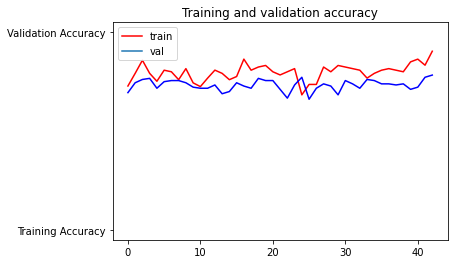

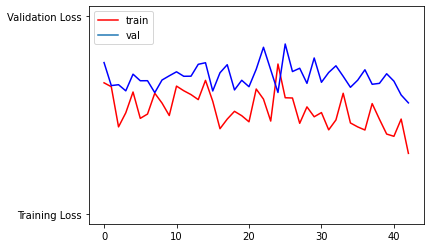

In [22]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
## CODE BLOCK FOR NON-SAFARI BROWSERS
## SAFARI USERS: PLEASE SKIP THIS BLOCK AND RUN THE NEXT ONE INSTEAD

import numpy as np
from google.colab import files
from keras.preprocessing import image


Saving WhatsApp Image 2022-06-08 at 12.22.39.jpeg to WhatsApp Image 2022-06-08 at 12.22.39 (7).jpeg
Saving open mouth1.jpg to open mouth1.jpg
Saving smile1.jpg to smile1.jpg
Saving smile.jpg to smile.jpg
Saving coba3.jpg to coba3.jpg


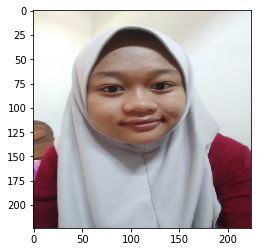

open-mouth: 0.00%
puff-cheeck: 0.14%
show-teeth: 0.14%
smile: 41.09%
sneer: 58.63%


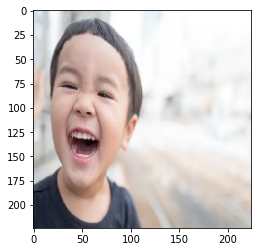

open-mouth: 88.90%
puff-cheeck: 3.31%
show-teeth: 2.71%
smile: 1.17%
sneer: 3.91%


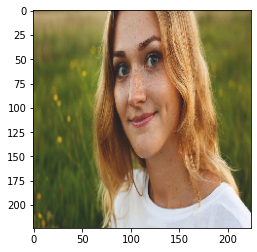

open-mouth: 0.01%
puff-cheeck: 0.02%
show-teeth: 0.07%
smile: 50.53%
sneer: 49.37%


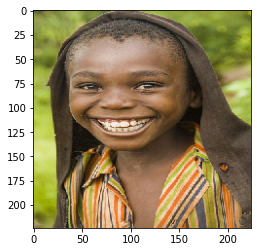

open-mouth: 0.00%
puff-cheeck: 0.00%
show-teeth: 0.27%
smile: 2.47%
sneer: 97.26%


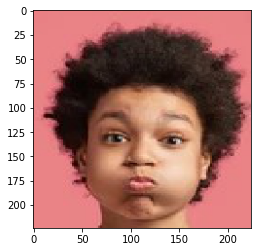

open-mouth: 0.01%
puff-cheeck: 54.25%
show-teeth: 0.03%
smile: 0.37%
sneer: 45.35%


In [25]:
labels = train_generator.class_indices.keys()
uploaded = files.upload()
from tensorflow.keras.applications.mobilenet import preprocess_input
for paths in uploaded.keys():
 
  # predicting images
  path = paths
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))

##6. Export Saved Model H5 extension



In [26]:
model.save('/tmp/model_facev1.h5') 

##Export Model Tflite extension

In [27]:
import pathlib

export_dir = '/tmp/saved_model'
tf.saved_model.save(model, export_dir)

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path('/tmp/model_face.tflite') 
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: /tmp/saved_model/assets


115572924

**testing tflite model**

In [28]:
# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)

# Point the data to be used for testing and run the interpreter
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [29]:
tflite_results

array([[0.00134542, 0.12080235, 0.02931735, 0.26362485, 0.58491004]],
      dtype=float32)